In [9]:
import pandas as pd
from urllib.parse import urlparse
import numpy as np
import nltk.data
from requests_html import HTMLSession

def parse_elements(url,element):
    session = HTMLSession()
    r = session.get(url)
    elements = r.html.find(element)
    return [element.text for element in elements]

url = 'https://www.censtatd.gov.hk/en/scode600.html'
paragraphs = parse_elements(url, 'p')
links = parse_elements(url, 'a')

In [11]:
df = pd.DataFrame(paragraphs, columns=['Text'])

In [23]:
df.head(10)

,Text
0,Demographic
1,2016
2,2021
3,Population
4,7 336 585
5,7 413 070
6,Median age
7,43.4
8,46.3
9,Dependency ratio (number of persons aged under...


In [25]:
header_df = df.iloc[0::3].reset_index(drop=True)
data_2016_df = df.iloc[1::3].reset_index(drop=True)
data_2021_df = df.iloc[2::3].reset_index(drop=True)

data_2016_df.columns = ["2016"]
data_2021_df.columns = ["2021"]

result_df = pd.concat([header_df, data_2016_df, data_2021_df], axis=1)

result_df

,Text,2016,2021
0,Demographic,2016,2021
1,Population,7 336 585,7 413 070
2,Median age,43.4,46.3
3,Dependency ratio (number of persons aged under...,373,438
4,Sex ratio (number of males per 1 000 females),852,839
5,Never-married population aged 15 and over (%),30.1,28.6
6,Non-Chinese ethnicities (%),8.0,8.4
7,Household,2016,2021
8,Number of domestic households,2 509 734,2 674 161
9,Average domestic household size,2.8,2.7


In [35]:
result_df['Text']

0                                           Demographic
1                                            Population
2                                            Median age
3     Dependency ratio (number of persons aged under...
4         Sex ratio (number of males per 1 000 females)
5         Never-married population aged 15 and over (%)
6                           Non-Chinese ethnicities (%)
7                                             Household
8                         Number of domestic households
9                       Average domestic household size
10       Median monthly domestic household income (HK$)
11                                            Education
12    Population aged 15 and over having attended po...
13                                             Economic
14                  Labour force participation rate (%)
15                                   Working population
16     Median monthly income from main employment (HK$)
17    Median weekly usual hours of work (includi

In [36]:
# Define the indicators you want to compare
indicators_to_compare = ["Population", "Number of domestic households", "Working population", "Number of occupied quarters"]

# Create a mask to filter rows where the 'Text' column matches the selected indicators
mask = result_df['Text'].isin(indicators_to_compare)

# Use the mask to select the rows corresponding to the selected indicators
selected_data = result_df[mask]

# Display the selected data
print(selected_data)


                             Text       2016       2021
1                      Population  7 336 585  7 413 070
8   Number of domestic households  2 509 734  2 674 161
15             Working population  3 756 612  3 681 295
19    Number of occupied quarters  2 526 026  2 688 812


In [42]:


# Calculate the percentage change for each indicator
selected_data.loc[:, 'Percentage Change'] = ((selected_data['2021'] - selected_data['2016']) / selected_data['2016']) * 100

# Display the resulting DataFrame
print(selected_data[['Text', 'Percentage Change']])


                             Text  Percentage Change
1                      Population           1.042515
8   Number of domestic households           6.551571
15             Working population          -2.004918
19    Number of occupied quarters           6.444352


In [44]:
selected_data

,Text,2016,2021,Percentage Change
1,Population,7336585,7413070,1.042515
8,Number of domestic households,2509734,2674161,6.551571
15,Working population,3756612,3681295,-2.004918
19,Number of occupied quarters,2526026,2688812,6.444352


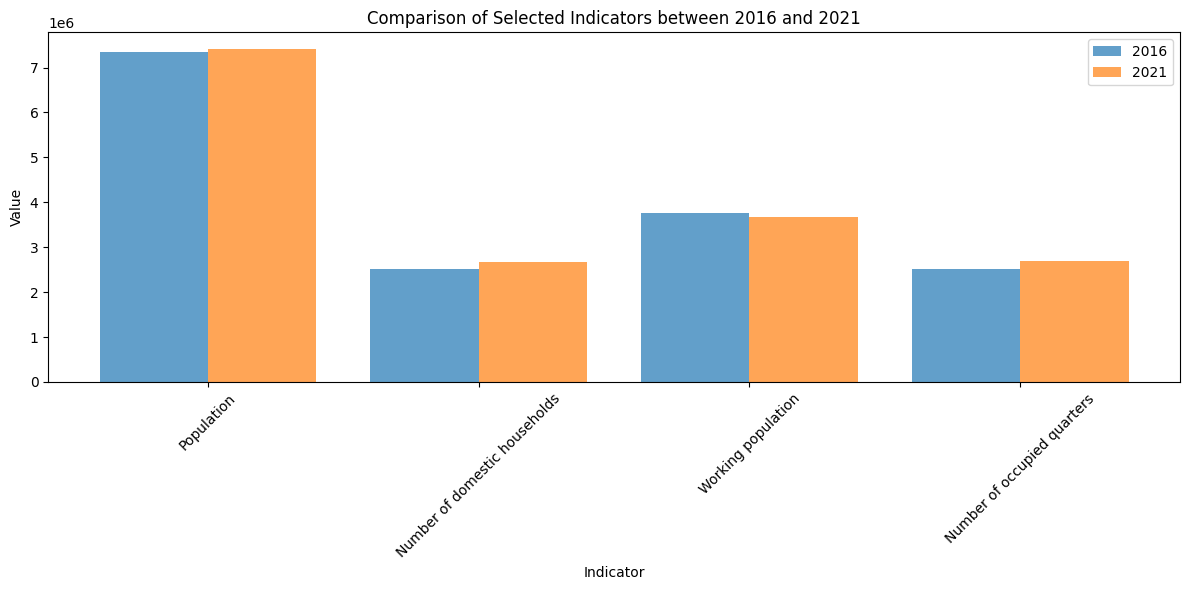

In [47]:
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(12, 6))

# Define the positions of the bars
x = np.arange(len(selected_data))

# Define the width of the bars
width = 0.4

# Create bar graphs for 2016 and 2021 values side by side
plt.bar(x - width/2, selected_data['2016'], width=width, label='2016', alpha=0.7)
plt.bar(x + width/2, selected_data['2021'], width=width, label='2021', alpha=0.7)

# Add labels and title
plt.xlabel("Indicator")
plt.ylabel("Value")
plt.title("Comparison of Selected Indicators between 2016 and 2021")
plt.xticks(x, selected_data['Text'], rotation=45)

# Add a legend
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [49]:
links

['Overview',
 'IDDS',
 'Press Releases',
 'Tables',
 'Reports',
 'Datasets',
 'Feature Articles',
 'Statistics in Other Sites',
 'Concepts and Methods',
 'Overview overview section',
 '2021 Population Census website',
 'Interactive Data Dissemination Service Interactive Data Dissemination Service section',
 'Interactive Data Dissemination Service for 2021 Population Census',
 'Press Releases Press Release section',
 'Tables Tables & Charts section',
 'Reports Reports section',
 'Datasets Datasets section',
 'Feature Articles Feature Articles section',
 'Statistics in Other Sites Statistics in Other Sites section',
 'Concepts and Methods Concepts and Methods section',
 'Feature Articles on Concepts and Methods Feature Articles on Concepts and Methods section',
 'References on Concepts and Methods References on Concepts and Methods section',
 'Statistical Classifications Statistical Classifications section',
 'Glossary Glossary section']

In [55]:
from selenium import webdriver
from selenium.webdriver.common.by import By

# Initialize the WebDriver (choose the appropriate browser)
driver = webdriver.Chrome()  # Change to Firefox() if using Firefox

# Navigate to the webpage
url = 'https://www.censtatd.gov.hk/en/scode600.html'  # Replace with the actual URL
driver.get(url)

# Find and click on the link to expand the "Concepts and Methods" section
concept_link = driver.find_element(By.CSS_SELECTOR, 'a[href="#conceptsMethods"]')
concept_link.click()

# Wait for the section to expand (you can customize the wait time as needed)
# Extract text from the expanded section
expanded_section = driver.find_element(By.ID, 'conceptsMethods1')
section_text = expanded_section.text

# Print or process the text as needed
print(section_text)

# Close the WebDriver
driver.quit()


History of Population Censuses and By-censuses
History of Population Censuses and By-censuses Toggle Collapse Expand
Objectives of Conducting Population Censuses and By-censuses
Objectives of Conducting Population Censuses and By-censuses Toggle Collapse Expand
Overall Design of the 2021 Population Census
Overall Design of the 2021 Population Census Toggle Collapse Expand
Coverage of the 2021 Population Census
Coverage of the 2021 Population Census Toggle Collapse Expand
Usual Residents
Usual Residents Toggle Collapse Expand
Mobile Residents
Mobile Residents Toggle Collapse Expand
Important Notes in Interpreting Figures
Important Notes in Interpreting Figures Toggle Collapse Expand
Glossary
Glossary Toggle Collapse Expand
